# Sequential Orthogonal Algorithm via QR (Teaching Version)

## Problem setup (exact columns)

We use

$$
a_1=\begin{pmatrix}1\\1\end{pmatrix},\qquad
 a_2=\begin{pmatrix}1\\1.01\end{pmatrix},\qquad
A=[a_1\;a_2]=\begin{pmatrix}1&1\\1&1.01\end{pmatrix}.
$$

Given $y=Ax$, solve for $x$ **without using $A^{-1}$**.

## Core idea

We orthogonalize the columns of $A$ (Gram-Schmidt):

$$A=QR,
$$

where columns of $Q$ are orthonormal, and $R$ is upper triangular.
Then

$$y=Ax=QRx\Rightarrow Q^Ty=Rx.
$$

So the solve has two simple steps:
1. **Projection step**: $c=Q^Ty$
2. **Back-substitution step**: solve $Rx=c$.

This is the “sequential orthogonal” method in a stable, teachable form.

## Step 0: Define the matrix and a test signal

In [22]:
import numpy as np
np.set_printoptions(precision=10, suppress=True)

# Columns requested in the problem
a1 = np.array([1.0, 1.0])
a2 = np.array([1.0, 1.01])

# Build A = [a1 a2]
A = np.column_stack([a1, a2])

print("a1 =", a1)
print("a2 =", a2)
print("\nA =")
print(A)
print(f"\ncond(A) = {np.linalg.cond(A):.2f}")

# Test truth
a_true = np.array([3.0, 2.0])
y = A @ a_true
print("\nx_true =", a_true)
print("y = A @ x_true =", y)

a1 = [1. 1.]
a2 = [1.   1.01]

A =
[[1.   1.  ]
 [1.   1.01]]

cond(A) = 402.01

x_true = [3. 2.]
y = A @ x_true = [5.   5.02]


## Step 1: First direction from the first column

Start with

$$a_1=\binom{1}{1},\qquad \|a_1\|=\sqrt{2}.
$$

So the first unit direction is

$$q_1=\frac{a_1}{\|a_1\|}=\frac{1}{\sqrt{2}}\binom{1}{1}.
$$

The first diagonal entry is

$$r_{11}=\|a_1\|=\sqrt{2}.
$$

Now project $a_2$ onto $q_1$:

$$r_{12}=q_1^Ta_2=\frac{1}{\sqrt{2}}(1+1.01)=\frac{2.01}{\sqrt{2}}.
$$

In [15]:
# Step 1: q1 and r12
r11 = np.linalg.norm(a1)
q1 = a1 / r11
r12 = q1 @ a2

print("q1 =", q1)
print("r11 =", r11)
print("r12 = q1^T a2 =", r12)
print("expected r12 = 2.01/sqrt(2) =", 2.01 / np.sqrt(2))

q1 = [0.7071067812 0.7071067812]
r11 = 1.4142135623730951
r12 = q1^T a2 = 1.4212846301849604
expected r12 = 2.01/sqrt(2) = 1.4212846301849602


## Step 2: Remove the projection from $a_2$

This is the key orthogonalization step:

$$u_2=a_2-r_{12}q_1.
$$

Interpretation: remove the component of $a_2$ along the first direction $q_1$.
The remainder $u_2$ is orthogonal to $q_1$.

Then normalize:

$$r_{22}=\|u_2\|,\qquad q_2=\frac{u_2}{r_{22}}.
$$

Now we have an orthonormal basis $Q=[q_1\;q_2]$ and

$$R=\begin{pmatrix}r_{11}&r_{12}\\0&r_{22}\end{pmatrix}.$$

In [16]:
# Step 2: remove projection and get q2
u2 = a2 - r12 * q1
r22 = np.linalg.norm(u2)
q2 = u2 / r22

Q = np.column_stack([q1, q2])
R = np.array([
    [r11, r12],
    [0.0, r22]
])

print("u2 = a2 - r12*q1 =", u2)
print("r22 =", r22)
print("q2 =", q2)
print("\nQ =")
print(Q)
print("\nR =")
print(R)
print("\nCheck orthogonality q1^T q2 =", q1 @ q2)
print("Check reconstruction ||A-QR|| =", np.linalg.norm(A - Q @ R))

u2 = a2 - r12*q1 = [-0.005  0.005]
r22 = 0.007071067811865481
q2 = [-0.7071067812  0.7071067812]

Q =
[[ 0.7071067812 -0.7071067812]
 [ 0.7071067812  0.7071067812]]

R =
[[1.4142135624 1.4212846302]
 [0.           0.0070710678]]

Check orthogonality q1^T q2 = 2.225997164373439e-14
Check reconstruction ||A-QR|| = 0.0


## Step 3: What is the projection step, exactly?

From

$$y=Ax=QRx,$$

multiply by $Q^T$:

$$Q^Ty=Rx.
$$

Define

$$c=Q^Ty=\binom{q_1^Ty}{q_2^Ty}.$$

This is the **projection**: we express $y$ in the orthonormal basis $(q_1,q_2)$.
Then solve the triangular system

$$\begin{pmatrix}r_{11}&r_{12}\\0&r_{22}\end{pmatrix}\binom{x_1}{x_2}=\binom{c_1}{c_2}
$$

by back-substitution:

$$x_2=\frac{c_2}{r_{22}},\qquad x_1=\frac{c_1-r_{12}x_2}{r_{11}}.$$

In [17]:
# Step 3: projection + triangular solve
c = Q.T @ y

x2 = c[1] / R[1, 1]
x1 = (c[0] - R[0, 1] * x2) / R[0, 0]
x_sol = np.array([x1, x2])

print("c = Q^T y =", c)
print("x from back-substitution =", x_sol)
print("x_true =", a_true)
print("\nVerification A @ x_sol =", A @ x_sol)
print("y                   =", y)
print("error ||x_sol - x_true|| =", np.linalg.norm(x_sol - a_true))

c = Q^T y = [7.0852099475 0.0141421356]
x from back-substitution = [3. 2.]
x_true = [3. 2.]

Verification A @ x_sol = [5.   5.02]
y                   = [5.   5.02]
error ||x_sol - x_true|| = 3.144151508515522e-11


## Step 4: Perturbation experiment (solve and compare)

Now compare two right-hand sides with the **same** matrix $A$:

$$y=\binom{1}{1},\qquad \tilde y=\binom{1.001}{1}=y+\Delta y,\quad \Delta y=\binom{0.001}{0}.$$

We solve both systems:

$$Ax=y,\qquad A\tilde x=\tilde y.$$

Then compare:
- data change $\|\Delta y\|$,
- solution change $\|\Delta x\|=\|\tilde x-x\|$,
- amplification ratio $\|\Delta x\|/\|\Delta y\|$.

A large ratio indicates sensitivity due to near-collinearity / ill-conditioning.

In [24]:
# Solve and compare: y=[1,1] vs y_tilde=[1.001,1]
y_base = np.array([1.0, 1.0])
y_tilde = np.array([1.001, 1.0])

x_base, info_base = solve_via_qr_sequential(A, y_base, tau=1e-14)
x_tilde, info_tilde = solve_via_qr_sequential(A, y_tilde, tau=1e-14)

delta_y = y_tilde - y_base
delta_x = x_tilde - x_base

amp_abs = np.linalg.norm(delta_x) / (np.linalg.norm(delta_y) + 1e-30)
amp_rel = (np.linalg.norm(delta_x) / (np.linalg.norm(x_base) + 1e-30)) / (
    np.linalg.norm(delta_y) / (np.linalg.norm(y_base) + 1e-30)
)

print("A =")
print(A)
print("\nBase rhs y       =", y_base)
print("Perturbed rhs y~  =", y_tilde)
print("Delta y           =", delta_y)

print("\nSolution x (base) =", x_base)
print("Solution x~       =", x_tilde)
print("Delta x           =", delta_x)

print("\n||Delta y|| =", np.linalg.norm(delta_y))
print("||Delta x|| =", np.linalg.norm(delta_x))
print("Absolute amplification  ||Delta x||/||Delta y|| =", amp_abs)
print("Relative amplification  (||Dx||/||x||)/(||Dy||/||y||) =", amp_rel)

print("\nResidual checks:")
print("||y - A x||/||y||       =", info_base["relative_residual"])
print("||y~ - A x~||/||y~||    =", info_tilde["relative_residual"])
print("cond(A)                 =", np.linalg.cond(A))

A =
[[1.   1.  ]
 [1.   1.01]]

Base rhs y       = [1. 1.]
Perturbed rhs y~  = [1.001 1.   ]
Delta y           = [0.001 0.   ]

Solution x (base) = [1. 0.]
Solution x~       = [ 1.101 -0.1  ]
Delta x           = [ 0.101 -0.1  ]

||Delta y|| = 0.0009999999999998899
||Delta x|| = 0.1421302219796867
Absolute amplification  ||Delta x||/||Delta y|| = 142.13022197970236
Relative amplification  (||Dx||/||x||)/(||Dy||/||y||) = 201.0024875476913

Residual checks:
||y - A x||/||y||       = 2.2260040859526065e-14
||y~ - A x~||/||y~||    = 2.2194470679511614e-14
cond(A)                 = 402.0075124842952


## Step 5: Where does noise leak? (conceptual derivation)

Suppose we observe $y = y_{\text{true}} + n$, where $n$ is noise. Trace through each step:

### Projection step: $c = Q^T y$

$$c = Q^T(y_{\text{true}} + n) = \underbrace{Q^T y_{\text{true}}}_{c_{\text{true}}} + \underbrace{Q^T n}_{c_n}.$$

Since $Q$ is orthogonal, it **preserves norms**:

$$\|c_n\| = \|Q^T n\| = \|n\|.$$

**No amplification here.** The noise is just rotated into the $(q_1, q_2)$ coordinate system. Each component gets:

$$c_{n,1} = q_1^T n, \qquad c_{n,2} = q_2^T n.$$

### Back-substitution step: $Rx = c$

$$x_2 = \frac{c_2}{r_{22}} = \frac{c_{\text{true},2} + c_{n,2}}{r_{22}},\qquad
x_1 = \frac{c_1 - r_{12}x_2}{r_{11}}.$$

The noise in $x_2$ is:

$$\boxed{\Delta x_2 = \frac{c_{n,2}}{r_{22}} = \frac{q_2^T n}{r_{22}}.}$$

**This is where it leaks!** When $r_{22}$ is small (nearly parallel columns), the division by $r_{22}$ amplifies whatever noise component fell along $q_2$.

Then the noise propagates into $x_1$ via the full back-substitution formula:

$$\Delta x_1 = \frac{c_{n,1} - r_{12}\,\Delta x_2}{r_{11}} = \frac{q_1^Tn - r_{12}\cdot\frac{q_2^Tn}{r_{22}}}{r_{11}}.$$

The $r_{12}\,\Delta x_2$ coupling drags the *amplified* $x_2$-noise into $x_1$ too.

### Summary: noise path

$$n \;\xrightarrow{Q^T}\; \begin{pmatrix}q_1^Tn\\q_2^Tn\end{pmatrix} \;\xrightarrow{\div\, r_{22}}\; \Delta x_2\text{ amplified} \;\xrightarrow{r_{12}\text{ coupling}}\; \text{leaks into }\Delta x_1.$$

| Step | Operation | Amplifies noise? |
|------|-----------|-----------------|
| $Q^T y$ | Rotation | **No** ($\|Q^Tn\|=\|n\|$) |
| $x_2 = c_2/r_{22}$ | Division by small $r_{22}$ | **YES** ($\times 1/r_{22}$) |
| $x_1 = (c_1-r_{12}x_2)/r_{11}$ | Coupling from amplified $x_2$ | **YES** (inherits amplified $\Delta x_2$) |

### When does noise NOT leak?
- If $A$ is **orthogonal**: $R=I$, all $r_{kk}=1$, no small divisors → **no leak**.
- If columns are **well-separated**: $r_{22}$ is $O(1)$ → small amplification → **little leak**.
- Noise only leaks badly when columns are **nearly parallel** ($r_{22}\to 0$, i.e., $\epsilon\to 0$).

In [26]:
# Numerical demonstration: trace noise through each step
n = np.array([0.001, 0.0])  # noise vector
y_clean = np.array([1.0, 1.0])
y_noisy = y_clean + n

print("=== Noise propagation trace ===")
print(f"Noise vector n          = {n}")
print(f"||n||                   = {np.linalg.norm(n):.6f}")

# Step 1: Q^T rotation (preserves norm)
c_n = Q.T @ n   # noise in Q-coordinates
print(f"\nAfter Q^T rotation:")
print(f"  c_n = Q^T n           = {c_n}")
print(f"  ||c_n||               = {np.linalg.norm(c_n):.6f}  (same as ||n|| ✓)")
print(f"  c_n1 = q1^T n         = {c_n[0]:.6f}  (noise along q1)")
print(f"  c_n2 = q2^T n         = {c_n[1]:.6f}  (noise along q2)")

# Step 2: back-substitution amplification
# x2 = c2/r22  →  Δx2 = c_n2/r22   (÷ small r22 = AMPLIFY)
# x1 = (c1 - r12 x2)/r11  →  Δx1 = (c_n1 - r12 Δx2)/r11
dx2 = c_n[1] / r22
dx1 = (c_n[0] - r12 * dx2) / r11
delta_x_noise = np.array([dx1, dx2])

print(f"\nAfter back-substitution (r22 = {r22:.6f}):")
print(f"  Δx2 = c_n2 / r22              = {c_n[1]:.6f} / {r22:.6f} = {dx2:.6f}  ← AMPLIFIED!")
print(f"  Δx1 = (c_n1 - r12·Δx2) / r11  = ({c_n[0]:.6f} - {r12:.4f}×{dx2:.4f}) / {r11:.4f} = {dx1:.6f}")
print(f"  Δx (noise in solution)         = {delta_x_noise}")
print(f"  ||Δx||                         = {np.linalg.norm(delta_x_noise):.6f}")

print(f"\n=== Amplification summary ===")
print(f"  ||Δx|| / ||n||  = {np.linalg.norm(delta_x_noise)/np.linalg.norm(n):.2f}")
print(f"  1/r22            = {1/r22:.2f}")
print(f"  cond(A)          = {np.linalg.cond(A):.2f}")

# Verify against direct solve
x_clean, _ = solve_via_qr_sequential(A, y_clean, tau=1e-14)
x_noisy, _ = solve_via_qr_sequential(A, y_noisy, tau=1e-14)
print(f"\n=== Direct verification ===")
print(f"  x_clean           = {x_clean}")
print(f"  x_noisy           = {x_noisy}")
print(f"  x_noisy - x_clean = {x_noisy - x_clean}")
print(f"  Δx from trace     = {delta_x_noise}")
print(f"  Match? {np.allclose(x_noisy - x_clean, delta_x_noise)}")

=== Noise propagation trace ===
Noise vector n          = [0.001 0.   ]
||n||                   = 0.001000

After Q^T rotation:
  c_n = Q^T n           = [ 0.0007071068 -0.0007071068]
  ||c_n||               = 0.001000  (same as ||n|| ✓)
  c_n1 = q1^T n         = 0.000707  (noise along q1)
  c_n2 = q2^T n         = -0.000707  (noise along q2)

After back-substitution (r22 = 0.007071):
  Δx2 = c_n2 / r22              = -0.000707 / 0.007071 = -0.100000  ← AMPLIFIED!
  Δx1 = (c_n1 - r12·Δx2) / r11  = (0.000707 - 1.4213×-0.1000) / 1.4142 = 0.101000
  Δx (noise in solution)         = [ 0.101 -0.1  ]
  ||Δx||                         = 0.142130

=== Amplification summary ===
  ||Δx|| / ||n||  = 142.13
  1/r22            = 141.42
  cond(A)          = 402.01

=== Direct verification ===
  x_clean           = [1. 0.]
  x_noisy           = [ 1.101 -0.1  ]
  x_noisy - x_clean = [ 0.101 -0.1  ]
  Δx from trace     = [ 0.101 -0.1  ]
  Match? True


## General sequential algorithm (Modified Gram-Schmidt)

For $A=[a_1,\dots,a_n]$, process columns sequentially:

1. Set $v_k=a_k$
2. For each previous direction $q_j$:
   - $r_{jk}=q_j^Tv_k$
   - $v_k\leftarrow v_k-r_{jk}q_j$  (remove projection)
3. Set $r_{kk}=\|v_k\|$
4. If $r_{kk}$ is tiny, stop (or mark column as dependent)
5. Set $q_k=v_k/r_{kk}$

Then solve $y=Ax$ via

$$c=Q^Ty,\qquad Rx=c.$$

### When to stop?
- **In decomposition**: stop at column $k$ if $r_{kk}<\tau$ (new direction has near-zero norm, numerical dependence).
- **In iterative/refinement use**: stop when $\|y-Ax\|/\|y\|<\text{tol}$.
- **Hard cap**: at most $n$ columns (or numerical rank).

In [23]:
def mgs_qr(A, tau=1e-14):
    """Modified Gram-Schmidt QR with rank detection."""
    m, n = A.shape
    Q = np.zeros((m, n))
    R = np.zeros((n, n))
    rank = 0

    for k in range(n):
        v = A[:, k].copy()

        for j in range(k):
            R[j, k] = Q[:, j] @ v
            v = v - R[j, k] * Q[:, j]

        R[k, k] = np.linalg.norm(v)
        if R[k, k] < tau:
            break

        Q[:, k] = v / R[k, k]
        rank += 1

    return Q[:, :rank], R[:rank, :], rank


def solve_via_qr_sequential(A, y, tau=1e-14):
    Q, R, rank = mgs_qr(A, tau=tau)
    c = Q.T @ y

    # Back substitution on leading rank x rank block
    x_head = np.zeros(rank)
    R11 = R[:, :rank]
    for i in range(rank - 1, -1, -1):
        x_head[i] = (c[i] - np.dot(R11[i, i + 1:], x_head[i + 1:])) / R11[i, i]

    # Full x (minimum-norm-like fill for undetermined tail)
    x = np.zeros(A.shape[1])
    x[:rank] = x_head

    rel_res = np.linalg.norm(y - A @ x) / (np.linalg.norm(y) + 1e-30)

    info = {
        "rank": rank,
        "Q": Q,
        "R": R,
        "c": c,
        "relative_residual": rel_res,
        "stop_reason": "rank-deficient (r_kk < tau)" if rank < A.shape[1] else "all columns processed"
    }
    return x, info

## Run on our 2×2 problem ($\epsilon = 0.1$)

In [19]:
print("=" * 68)
print("Sequential orthogonal solve (QR) for A=[a1 a2]")
print("=" * 68)

x_qr, info = solve_via_qr_sequential(A, y, tau=1e-14)

print("rank =", info["rank"])
print("stop_reason =", info["stop_reason"])
print("\nQ =")
print(info["Q"])
print("\nR =")
print(info["R"])
print("\nc = Q^T y =", info["c"])

print("\nRecovered x =", x_qr)
print("True x      =", a_true)
print("Error ||x_qr - x_true|| =", np.linalg.norm(x_qr - a_true))
print("Relative residual ||y-Ax||/||y|| =", info["relative_residual"])
print("=" * 68)

Sequential orthogonal solve (QR) for A=[a1 a2]
rank = 2
stop_reason = all columns processed

Q =
[[ 0.7071067812 -0.7071067812]
 [ 0.7071067812  0.7071067812]]

R =
[[1.4142135624 1.4212846302]
 [0.           0.0070710678]]

c = Q^T y = [7.0852099475 0.0141421356]

Recovered x = [3. 2.]
True x      = [3. 2.]
Error ||x_qr - x_true|| = 3.144151508515522e-11
Relative residual ||y-Ax||/||y|| = 2.2160805180409735e-14


## Convergence Plot

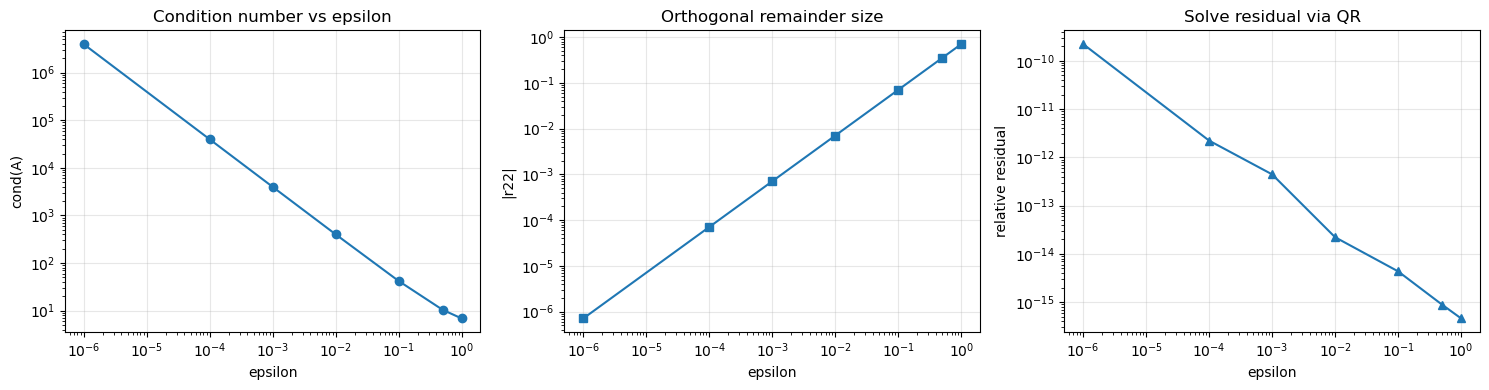

In [20]:
import matplotlib.pyplot as plt

# Small experiment: how near-collinearity affects r22 and conditioning
eps_grid = [1e0, 5e-1, 1e-1, 1e-2, 1e-3, 1e-4, 1e-6]
r22_vals, cond_vals, relres_vals = [], [], []

for eps in eps_grid:
    A_eps = np.array([[1.0, 1.0], [1.0, 1.0 + eps]])
    y_eps = A_eps @ a_true
    x_eps, info_eps = solve_via_qr_sequential(A_eps, y_eps, tau=1e-14)

    r22_eps = info_eps["R"][1, 1] if info_eps["rank"] == 2 else np.nan
    r22_vals.append(abs(r22_eps))
    cond_vals.append(np.linalg.cond(A_eps))
    relres_vals.append(info_eps["relative_residual"])

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

axes[0].loglog(eps_grid, cond_vals, 'o-')
axes[0].set_xlabel('epsilon')
axes[0].set_ylabel('cond(A)')
axes[0].set_title('Condition number vs epsilon')
axes[0].grid(True, alpha=0.3)

axes[1].loglog(eps_grid, r22_vals, 's-')
axes[1].set_xlabel('epsilon')
axes[1].set_ylabel('|r22|')
axes[1].set_title('Orthogonal remainder size')
axes[1].grid(True, alpha=0.3)

axes[2].loglog(eps_grid, relres_vals, '^-')
axes[2].set_xlabel('epsilon')
axes[2].set_ylabel('relative residual')
axes[2].set_title('Solve residual via QR')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Test with different $\epsilon$ values

Let's see how the number of iterations changes as $\epsilon$ gets smaller (matrix becomes more ill-conditioned). The algorithm should still converge — it just may need more iterations to peel off the nearly-degenerate layers.

In [21]:
epsilons = [1.0, 0.5, 0.1, 0.01, 0.001, 1e-6]

print(f"{'eps':>10s} | {'r12':>12s} | {'r22':>12s} | {'cond(A)':>12s} | {'rel_resid':>12s}")
print("-" * 76)

for eps in epsilons:
    a1_t = np.array([1.0, 1.0])
    a2_t = np.array([1.0, 1.0 + eps])
    A_t = np.column_stack([a1_t, a2_t])

    r11_t = np.linalg.norm(a1_t)
    q1_t = a1_t / r11_t
    r12_t = q1_t @ a2_t
    u2_t = a2_t - r12_t * q1_t
    r22_t = np.linalg.norm(u2_t)

    y_t = A_t @ a_true
    x_t, info_t = solve_via_qr_sequential(A_t, y_t, tau=1e-14)

    print(f"{eps:10.1e} | {r12_t:12.6f} | {r22_t:12.6e} | {np.linalg.cond(A_t):12.2f} | {info_t['relative_residual']:12.2e}")

       eps |          r12 |          r22 |      cond(A) |    rel_resid
----------------------------------------------------------------------------
   1.0e+00 |     2.121320 | 7.071068e-01 |         6.85 |     4.62e-16
   5.0e-01 |     1.767767 | 3.535534e-01 |        10.40 |     8.88e-16
   1.0e-01 |     1.484924 | 7.071068e-02 |        42.08 |     4.35e-15
   1.0e-02 |     1.421285 | 7.071068e-03 |       402.01 |     2.22e-14
   1.0e-03 |     1.414921 | 7.071068e-04 |      4002.00 |     4.44e-13
   1.0e-06 |     1.414214 | 7.071068e-07 |   4000002.00 |     2.22e-10


## Summary: complete problem in compact form

With

$$a_1=\binom{1}{1},\qquad a_2=\binom{1}{1.01},$$

we get

$$q_1=\frac{1}{\sqrt{2}}\binom{1}{1},\qquad r_{11}=\sqrt{2},\qquad r_{12}=q_1^Ta_2=\frac{2.01}{\sqrt{2}}.$$

Then

$$u_2=a_2-r_{12}q_1,\qquad r_{22}=\|u_2\|,\qquad q_2=\frac{u_2}{r_{22}}.$$

So

$$Q=[q_1\;q_2],\qquad R=\begin{pmatrix}r_{11}&r_{12}\\0&r_{22}\end{pmatrix},\qquad A=QR.$$

To solve $y=Ax$:

1. **Projection**: $c=Q^Ty$ (coordinates of $y$ along orthonormal directions)
2. **Back-substitution**: solve $Rx=c$

### Stopping rules (general $n\times n$ case)
- During orthogonalization: stop/flag dependence when $r_{kk}<\tau$.
- During solve quality check: stop when $\|y-Ax\|/\|y\|<\text{tol}$.
- Always bounded by at most $n$ columns (or numerical rank).